In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Układ dwóch neuronów McCullocha-Pittsa
*Wang X., Complex Systems **5**, 425 (1991)*

<img src="2neurony.jpg" style="height:200px">

$$
S_1(t+1)=f [( w_{11}S_1(t)+w_{12}S_2(t) ]
$$
$$
S_2(t+1)=f [( w_{21}S_1(t)+w_{22}S_2(t) ]
$$

## Funkcja aktywacji
$$
f(x) = \frac{1}{1+e^{-\mu x}}
$$

In [2]:
def f(x,μ):
    return 1/(1+exp(-μ*x));

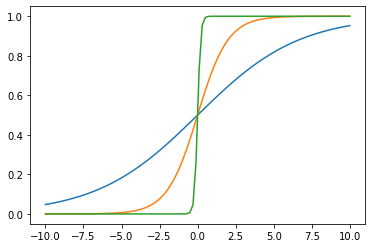

In [3]:
x=linspace(-10,10,100)
plot(x, f(x,0.3))
plot(x, f(x,1))
plot(x, f(x,10));

### Wagi połączeń

In [4]:
a=-5
b=-25
W=array([[a,-a],[b,-b]])
W

array([[ -5,   5],
       [-25,  25]])

In [5]:
def run(μ, steps=100, trans=1000):
    # warunek początkowy
    S=array([0.35,0.55])
    
    # stan przejściowy (transient)
    for i in range(trans):
        S=f(W@S,μ)
    X=zeros((steps,2))
    
    # właściwy pomiar
    for i in range(steps):
        S=f(W@S,μ)
        X[i]=f(W@S,μ)
    return X

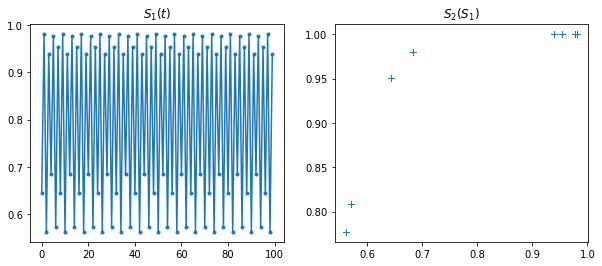

In [42]:
# 1, 2, 2.4, 2.55, 3(c), 4(c), 4.5(3), 4.6(5)
x=run(2.55,100,200)
figure(figsize=(10,4))
subplot(121)
plot(x[:100,0],".-")
#plot(x[:50,1],'r.-')
title("$S_1(t)$")
subplot(122)
title("$S_2(S_1)$")
plot(x[:,0],x[:,1],"+");

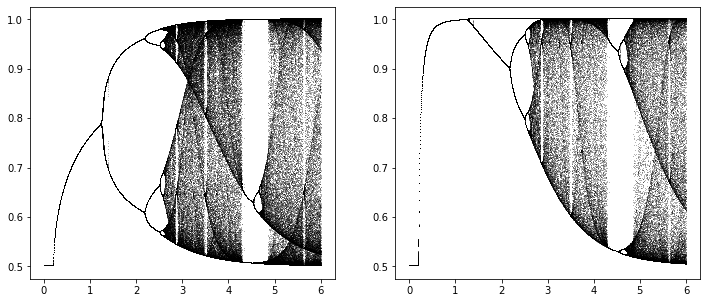

In [39]:
fig, axs = subplots(1, 2, figsize=(12, 5));

for μ in linspace(0,6,3000):
    x=run(μ,100,100)
    axs[0].plot([μ for i in x[:,0]],x[:,0],"k,", alpha=0.3);
    axs[1].plot([μ for i in x[:,1]],x[:,1],"k,", alpha=0.3);